In [1]:
#Importing librairies for the project

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# I. Data Preprocessing

In [2]:
#Reading
data = pd.read_csv('train_auto.csv')

In [3]:
#First vizualisation
print(data.head())
print(data.shape)

   INDEX  TARGET_FLAG  TARGET_AMT  KIDSDRIV   AGE  HOMEKIDS   YOJ     INCOME  \
0      1            0         0.0         0  60.0         0  11.0   $67,349    
1      2            0         0.0         0  43.0         0  11.0   $91,449    
2      4            0         0.0         0  35.0         1  10.0   $16,039    
3      5            0         0.0         0  51.0         0  14.0        NaN   
4      6            0         0.0         0  50.0         0   NaN  $114,986    

  PARENT1   HOME_VAL  ...  BLUEBOOK TIF CAR_TYPE RED_CAR  OLDCLAIM CLM_FREQ  \
0      No        $0   ...  $14,230   11  Minivan     yes   $4,461         2   
1      No  $257,252   ...  $14,940    1  Minivan     yes       $0         0   
2      No  $124,191   ...   $4,010    4    z_SUV      no  $38,690         2   
3      No  $306,251   ...  $15,440    7  Minivan     yes       $0         0   
4      No  $243,925   ...  $18,000    1    z_SUV      no  $19,217         2   

  REVOKED  MVR_PTS CAR_AGE           URBANIC

In [4]:
#Checking wich features we have
data.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

### Deleting useless columns

In [5]:
#As pandas is already recreating an Index, we can delete this column
#Our goal is to predict TARGET_FLAG and TARGET_AMT is not completed in the test dataset thus we can also delete TARGET_AMT
data.drop(columns=['INDEX', 'TARGET_AMT'], inplace=True)

### String to float

In [6]:
#We need to convert the string in the format "$XXXX,XX" into float :
#On columns : INCOME, BLUEBOOK, OLDCLAIM, HOME_VAL

#Replacement of , to . to convert it
data.INCOME.loc[data.INCOME.notnull()] = data.INCOME.str.replace(',', '.')
data.INCOME.loc[data.INCOME.notnull()] = data.INCOME.str.replace('$', '').astype(float)

data["BLUEBOOK"].loc[data.BLUEBOOK.notnull()] = data["BLUEBOOK"].str.replace(',', '.')
data["BLUEBOOK"].loc[data.BLUEBOOK.notnull()] = data["BLUEBOOK"].str.replace('$', '').astype(float)

data["OLDCLAIM"].loc[data.OLDCLAIM.notnull()] = data["OLDCLAIM"].str.replace(',', '.')
data["OLDCLAIM"].loc[data.OLDCLAIM.notnull()] = data["OLDCLAIM"].str.replace('$', '').astype(float)

data["HOME_VAL"].loc[data.HOME_VAL.notnull()] = data["HOME_VAL"].str.replace(',', '.')
data["HOME_VAL"].loc[data.HOME_VAL.notnull()] = data["HOME_VAL"].str.replace('$', '').astype(float)

#Check we did it correctly
data.head()

C:\Program Files\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0,60.0,0,11.0,67.349,No,0,z_No,M,...,14.23,11,Minivan,yes,4.461,2,No,3,18.0,Highly Urban/ Urban
1,0,0,43.0,0,11.0,91.449,No,257.252,z_No,M,...,14.94,1,Minivan,yes,0.000,0,No,0,1.0,Highly Urban/ Urban
2,0,0,35.0,1,10.0,16.039,No,124.191,Yes,z_F,...,4.01,4,z_SUV,no,38.690,2,No,3,10.0,Highly Urban/ Urban
3,0,0,51.0,0,14.0,NaN,No,306.251,Yes,M,...,15.44,7,Minivan,yes,0.000,0,No,0,6.0,Highly Urban/ Urban
4,0,0,50.0,0,NaN,114.986,No,243.925,Yes,z_F,...,18.00,1,z_SUV,no,19.217,2,Yes,3,17.0,Highly Urban/ Urban


### Categories to float

In [7]:
#Now some categorical features have to be preprocessed
#The columns PARENT1, MSTATUS, SEX, EDUCATION, JOB, CAR_USE, CAR_TYPE, RED_CAR, REVOKED, URBANICITY need to be converted into float
#Using One Hot Encoder :

for feature in ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']:
    #Encoding the labels
    y = OneHotEncoder().fit_transform(np.array(data[[feature]]).reshape(-1, 1)).toarray()
    #Retrieving the code for each category
    y = list(np.where(y==1)[1])
    data[feature] = y
             
#pd.get_dummies(data['CAR_TYPE'])

#Checking
data.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,0,60.0,0,11.0,67.349,0,0,1,0,...,14.23,11,0,1,4.461,2,0,3,18.0,0
1,0,0,43.0,0,11.0,91.449,0,257.252,1,0,...,14.94,1,0,1,0.000,0,0,0,1.0,0
2,0,0,35.0,1,10.0,16.039,0,124.191,0,1,...,4.01,4,5,0,38.690,2,0,3,10.0,0
3,0,0,51.0,0,14.0,NaN,0,306.251,0,0,...,15.44,7,0,1,0.000,0,0,0,6.0,0
4,0,0,50.0,0,NaN,114.986,0,243.925,0,1,...,18.00,1,5,0,19.217,2,1,3,17.0,0


### Normalizing

In [8]:
#This way every feature can have the same influence of the result

x = data.values 
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns= data.columns)

#Checking
data.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0.0,0.0,0.676923,0.0,0.478261,0.067552,0.0,0.000000,1.0,0.0,...,0.186547,0.416667,0.0,1.0,0.004465,0.4,0.0,0.230769,0.677419,0.0
1,0.0,0.0,0.415385,0.0,0.478261,0.091724,0.0,0.290588,1.0,0.0,...,0.196952,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.129032,0.0
2,0.0,0.0,0.292308,0.2,0.434783,0.016087,0.0,0.140284,0.0,1.0,...,0.036782,0.125000,1.0,0.0,0.038729,0.4,0.0,0.230769,0.419355,0.0
3,0.0,0.0,0.538462,0.0,0.608696,NaN,0.0,0.345936,0.0,0.0,...,0.204279,0.250000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.290323,0.0
4,0.0,0.0,0.523077,0.0,NaN,0.115332,0.0,0.275534,0.0,1.0,...,0.241794,0.000000,1.0,0.0,0.019236,0.4,1.0,0.230769,0.645161,0.0


In [9]:
#We can start to look which variables have the best correlation with Target Flag :

print(data.corr()['TARGET_FLAG'])
#data[['INCOME', 'HOME_VAL', 'EDUCATION', 'JOB']].corr()

TARGET_FLAG    1.000000
KIDSDRIV       0.103668
AGE           -0.103217
HOMEKIDS       0.115621
YOJ           -0.070512
INCOME        -0.106406
PARENT1        0.157622
HOME_VAL      -0.183737
MSTATUS        0.135125
SEX            0.021079
EDUCATION      0.042873
JOB            0.061041
TRAVTIME       0.048368
CAR_USE       -0.142674
BLUEBOOK      -0.103383
TIF           -0.082370
CAR_TYPE       0.102365
RED_CAR       -0.006947
OLDCLAIM       0.031704
CLM_FREQ       0.216196
REVOKED        0.151939
MVR_PTS        0.219197
CAR_AGE       -0.100651
URBANICITY    -0.224251
Name: TARGET_FLAG, dtype: float64


### NaN values

In [10]:
# How can we treat the NaN values ? 
#How many of those do we have by columns : 
print(data.isna().sum())

#We can start by just deleting them, but we will have issues with the other dataset that we need to predict
#data_reduce = data.dropna()
#print(data_reduce.shape[0]/data.shape[0])

#Or : we use interpolation to fill the NaN values, we will do the same with the other dataset
#We replace the Nan with the mean value of the column
data.fillna(data.mean(), inplace=True)

TARGET_FLAG      0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB              0
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64


# 2. Machine Learning models

In [11]:
#We want to predict TARGET_FLAG

#Values to predict
y=data.TARGET_FLAG

#Features
X = data.drop(columns='TARGET_FLAG')

### Linear Discriminant Analysis

In [12]:
#First try with LDA on all dataset :

lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(X, y)

predictions=lda.predict(X)
print('Accuracy of LDA :',accuracy_score(predictions, y))

Accuracy of LDA : 0.7828697463546134


### Dimensionality reduction - Principal Component Analysis

In [13]:
#As we have a lot of features, we can reduce the dimensionality by using PCA for computational performances 
#We will use the transformed dataset for the other techniques

pca = PCA(n_components=12)
data_pca = pca.fit_transform(X)

print('Amount of kept information :',sum(pca.explained_variance_ratio_))

#If we don't want to reduce the dimension
#data_pca=X

Amount of kept information : 0.9117830049664658


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2, random_state=42)

### Nearest Neighbors

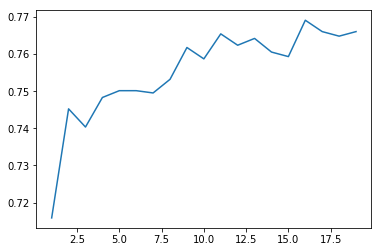

In [15]:
#Trying with kNN :

#We can test several numbers of neighbors 
scores=[]
for k in range(1,20):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    y_predicted = neigh.predict(X_test)
    scores.append(accuracy_score(y_predicted, y_test))

plt.plot(range(1,20),scores)

### Random forest

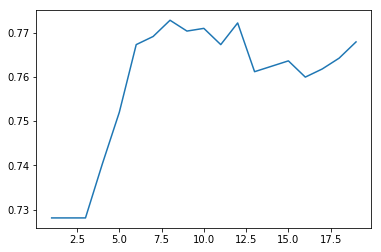

In [16]:
#Trying with random forests
#We can try different depths

scores=[]
for k in range(1, 20):
    clf = RandomForestClassifier(max_depth=k, random_state=0)
    clf.fit(X_train, y_train)
    y_predicted=clf.predict(X_test)
    scores.append(accuracy_score(y_predicted, y_test))

plt.plot(range(1,20), scores)


Best performances for a depth of 13, above 77% of accuracy

### XGBoost

In [17]:
#Trying with the famous XGBoost Classifier
model = XGBClassifier()
# Fit model with training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('XGBoost accuracy :',accuracy_score(y_pred, y_test))

C:\Users\Xav\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy : 0.7593386405388854


# 3. Predictions

In [18]:
#Loading the dataset

data_test=pd.read_csv('test_auto.csv')
new_table = data_test.copy()
data_test.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


### Preprocessing

In [19]:
#We need to apply the same treatment as before

#Useless columns, this time including TARGET_FLAG that we xant to predict
data_test.drop(columns=['INDEX', 'TARGET_AMT', 'TARGET_FLAG'], inplace=True)

#String to float
data_test.INCOME.loc[data_test.INCOME.notnull()] = data_test.INCOME.str.replace(',', '.')
data_test.INCOME.loc[data_test.INCOME.notnull()] = data_test.INCOME.str.replace('$', '').astype(float)

data_test["BLUEBOOK"].loc[data_test.BLUEBOOK.notnull()] = data_test["BLUEBOOK"].str.replace(',', '.')
data_test["BLUEBOOK"].loc[data_test.BLUEBOOK.notnull()] = data_test["BLUEBOOK"].str.replace('$', '').astype(float)

data_test["OLDCLAIM"].loc[data_test.OLDCLAIM.notnull()] = data_test["OLDCLAIM"].str.replace(',', '.')
data_test["OLDCLAIM"].loc[data_test.OLDCLAIM.notnull()] = data_test["OLDCLAIM"].str.replace('$', '').astype(float)

data_test["HOME_VAL"].loc[data_test.HOME_VAL.notnull()] = data_test["HOME_VAL"].str.replace(',', '.')
data_test["HOME_VAL"].loc[data_test.HOME_VAL.notnull()] = data_test["HOME_VAL"].str.replace('$', '').astype(float)

#Categories
for feature in ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']:
    #Encoding the labels
    y = OneHotEncoder().fit_transform(np.array(data_test[[feature]]).reshape(-1, 1)).toarray()
    #Retrieving the code 
    y = list(np.where(y==1)[1])
    data_test[feature] = y

#Normalizing
x = data_test.values #returns a numpy array
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_test = pd.DataFrame(x_scaled, columns= data_test.columns)

#Interpolating
data_test.fillna(data_test.mean(), inplace=True)

data_test.head()

C:\Program Files\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0.000000,0.553571,0.0,0.578947,0.181608,0.0,0.0,1.0,0.0,0.25,...,0.422585,0.000000,0.8,1.0,0.000000,0.0,0.0,0.166667,0.384615,0.0
1,0.333333,0.410714,0.2,0.578947,0.174513,1.0,0.0,1.0,0.0,1.00,...,0.359827,0.208333,0.0,0.0,0.003312,0.2,0.0,0.166667,0.038462,0.0
2,0.000000,0.482143,0.4,0.631579,0.149343,1.0,0.0,1.0,1.0,1.00,...,0.090834,0.375000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.384615,1.0
3,0.000000,0.321429,0.4,0.546268,0.072820,1.0,0.0,1.0,0.0,1.00,...,0.159579,0.208333,0.4,0.0,0.000000,0.0,1.0,0.000000,0.153846,1.0
4,0.000000,0.750000,0.0,0.631579,0.300362,0.0,0.0,1.0,0.0,1.00,...,0.287366,0.000000,0.0,1.0,0.045082,0.4,0.0,0.333333,0.038462,0.0


### Adding labels

In [20]:
#we saw that every model has quiet the same performances,
#We can then use the first one for example

pred=lda.predict(data_test)
#and add it into a copy of the initial table
new_table.TARGET_FLAG = pred
new_table.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,0.0,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,0.0,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,0.0,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,0.0,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,0.0,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [21]:
#Saving the new table as csv

new_table.to_csv('predictions.csv', sep=',', index=False)

# 4.Conclusion

In [22]:
print('Amount of 1 in traning dataset :', np.mean(data.TARGET_FLAG))
print('Amount of 1 in predictions :', np.mean(pred))

Amount of 1 in traning dataset : 0.2638157088592084
Amount of 1 in predictions : 0.1373190098085007
